# Project for: UC3M Class - Optimization and Decision Analytics
Author: Simon Schmetz

*Required Libraries*
pip install matplotlib networkx


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np

## Ideas: 
- Turn into Matrixes
- Every Demand takes the most direct (shortest) route
- People can switch trains

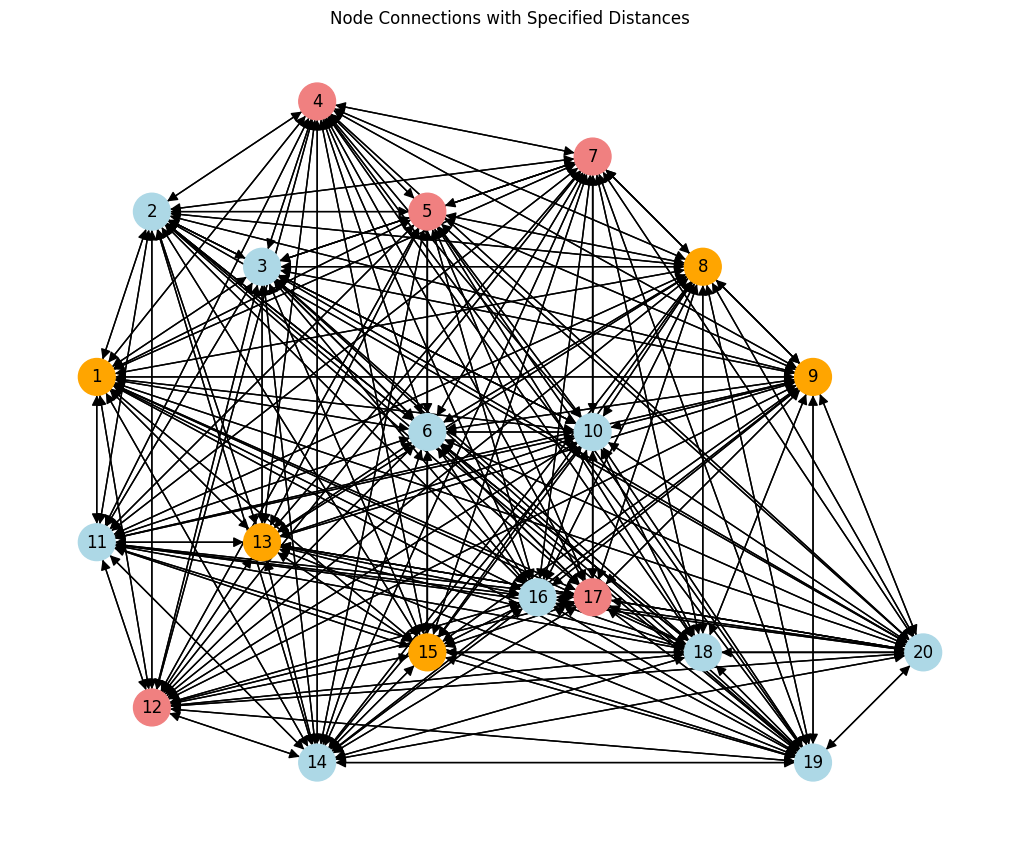

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Number of nodes
n_nodes = 20

# Create a list for connections
nodes = range(1, n_nodes+1)
routes = [(m, n) for m in nodes for n in nodes if m != n]

# Create a directed graph
G = nx.DiGraph()

# Add edges from the connections list
G.add_edges_from(routes)

# Manually specify positions of nodes (coordinates reflect their distance)
positions = {
    1: (2, 10),  
    2: (3, 13),
    3: (5, 12),
    4: (6, 15),
    5: (8, 13),   
    6: (8, 9),   
    7: (11, 14),
    8: (13, 12), 
    9: (15, 10),
    10: (11, 9),
    11: (2, 7),
    12: (3, 4),
    13: (5, 7),  
    14: (6, 3),
    15: (8, 5), 
    16: (10, 6),
    17: (11, 6),
    18: (13, 5),
    19: (15, 3),
    20: (17, 5)
}

# Define main & medium nodes
main_nodes = {4, 5, 7, 12, 17}
medium_nodes = {9, 15, 13, 1, 8}

# Create a list of demands (randomly generated for illustration)
demands = [random.randint(200, 400) for _ in range(len(routes))]

# Create a dictionary for connection demands
connections_demand = {}
for connection, demand in zip(routes, demands):
    if connection[0] in main_nodes or connection[1] in main_nodes:
        demand *= 4  # Multiply demand for main nodes
    if connection[0] in medium_nodes or connection[1] in medium_nodes:
        demand *= 2  # Multiply demand for medium nodes
    connections_demand[connection] = demand  # Store connection and its demand in the dictionary

# Plot Network
plt.figure(figsize=(10, 8))
node_colors = ['lightcoral' if node in main_nodes else 'orange' if node in medium_nodes else 'lightblue' for node in G.nodes()]
node_color_dict = {node: color for node, color in zip(G.nodes(), node_colors)}

nx.draw(G, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
plt.title("Node Connections with Specified Distances")
plt.show()


In [3]:
routes = [
    #1 #2 #3 #4 #5 #6 #7 #8 #9 #10#11#12#13#14#15#16#17#18#19#20
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #2
    [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #3
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #4
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #5
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #6
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #7
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], #9
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #10
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], #11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], #12
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], #13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], #14
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], #15
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], #16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], #17
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], #18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], #19
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #20
]

# Function to calculate the Euclidean distance between two points
def euclidean_distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

# Create a distance matrix and fill it with NaN where nodes are not connected
n = len(positions)
distance_matrix = np.full((n, n), np.inf)

for i in range(n):
    for j in range(n):
        if routes[i][j] == 1:
            pos_i = positions[i + 1]  # +1 because positions are 1-indexed
            pos_j = positions[j + 1]  # +1 because positions are 1-indexed
            distance_matrix[i][j] = euclidean_distance(pos_i, pos_j)


# Iterate through all pairs of nodes
connections = []
for i in range(len(routes)):
    for j in range(len(routes[i])):
        if routes[i][j] == 1:  # Check for a connection
            connections.append((i + 1, j + 1))  # Add 1 to make it 1-based indexing

# Create a new dictionary for edge labels (distances)
edges = {}
for i in nodes:
    for j in nodes:
        if routes[i-1][j-1] == 1:
            edges[(i, j)] = float(round(distance_matrix[i-1][j-1], 2))  # +1 to match 1-indexing




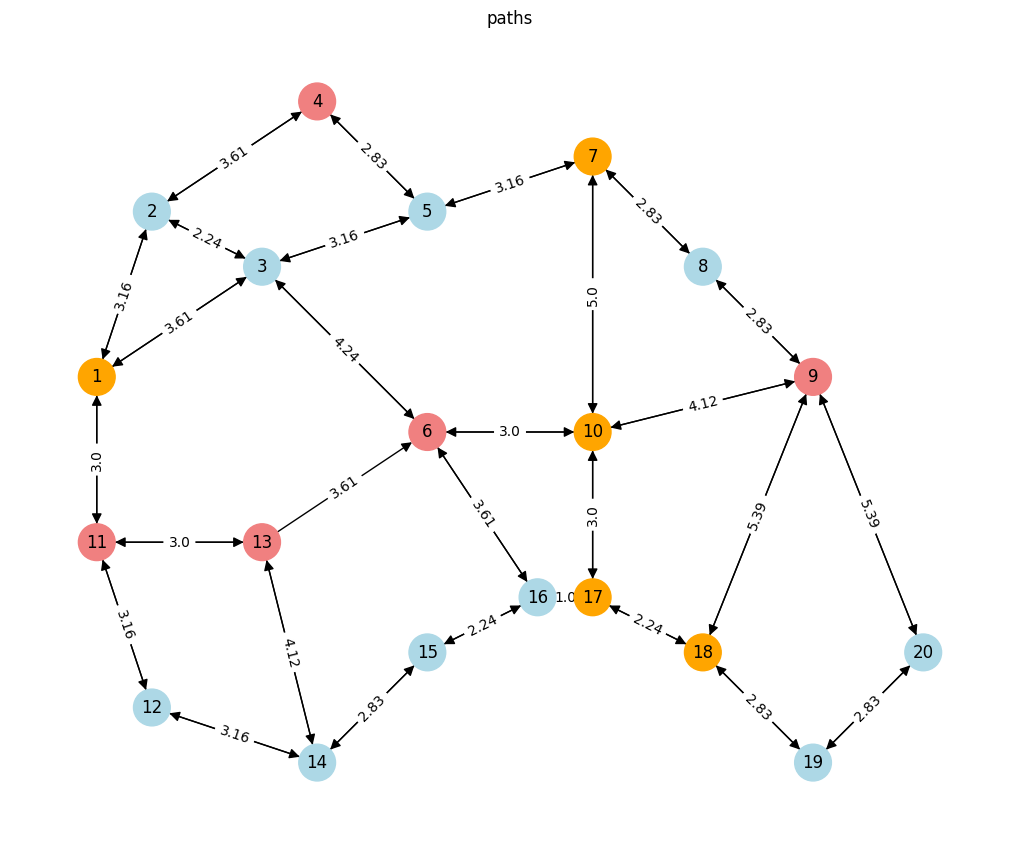

In [4]:

# Plot
G_closest = nx.DiGraph()
G_closest.add_edges_from(connections)

plt.figure(figsize=(10, 8))
nx.draw(G_closest, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
nx.draw_networkx_edge_labels(G_closest, pos=positions, edge_labels=edges, font_size=10)

plt.title("paths")
plt.show()

In [5]:
from pyomo.environ import *


# shortest path function function
def shortest_path(model, 
                  source,
                  destination,
                  nodes,
                  arcs,
                  cost,
                  bool_print=False):
    model.source = source
    model.destination = destination

    model.nodes = Set(initialize=nodes) 
    model.arcsrcs = Set(within=model.nodes*model.nodes, initialize=arcs)
    model.cost = Param(model.arcsrcs, initialize=cost)

    model.x = Var(model.arcsrcs, domain=NonNegativeReals)

    # obj function
    def obj_rule(model):
        return sum(model.cost[i, j] * model.x[i, j] for (i, j) in model.arcsrcs)
    model.obj = Objective(rule=obj_rule, sense=minimize)

    # Constraint
    def flow_conservation_rule(model, node):
        if node == model.source:  # Source node
            return ((sum(model.x[i, node] for i in model.nodes if (i, node) in model.arcsrcs) + sum(model.x[node, j] for j in model.nodes if (node, j) in model.arcsrcs)) == 1)
        elif node == model.destination:  # Destination node
            return ((sum(model.x[node, i] for i in model.nodes if (node, i) in model.arcsrcs) + sum(model.x[j, node] for j in model.nodes if (j, node) in model.arcsrcs)) == 1)
        else:
            return ((sum(model.x[i, node] for i in model.nodes if (i, node) in model.arcsrcs) == sum(model.x[node, j] for j in model.nodes if (node, j) in model.arcsrcs)))
    model.flow_conservation = Constraint(model.nodes, rule=flow_conservation_rule)


    def flow_start_stop_rule(model, node): # makes the route start at the chosen starting node
        if node == model.source:  # Source node
            return (sum(model.x[node, j] for j in model.nodes if (node, j) in model.arcsrcs) == 1)
        elif node == model.destination:  # Destination node
            return (sum(model.x[j, node] for j in model.nodes if (j, node) in model.arcsrcs) == 1)
        else: 
            return (sum(model.x[j, node] for j in model.nodes if (j, node) in model.arcsrcs) <=1)

    model.flow_start_stop_rule = Constraint(model.nodes, rule=flow_start_stop_rule)

    # Solve 
    solver = SolverFactory('glpk')
    solver.solve(model)

    # Results and plots
    shortest_path_result = {}

    if bool_print: 
        print("obj function value:")
        print(value(model.obj))
        print("Variables with value unequal to 1:")

    for (i, j) in model.arcsrcs:
        if model.x[i, j].value != 0:
            shortest_path_result[(i, j)] = model.x[i, j].value
            if bool_print: 
                print(f"x[{i},{j}] = {model.x[i, j].value}")

    
    return shortest_path_result


obj function value:
3.16
Variables with value unequal to 1:
x[1,2] = 1.0


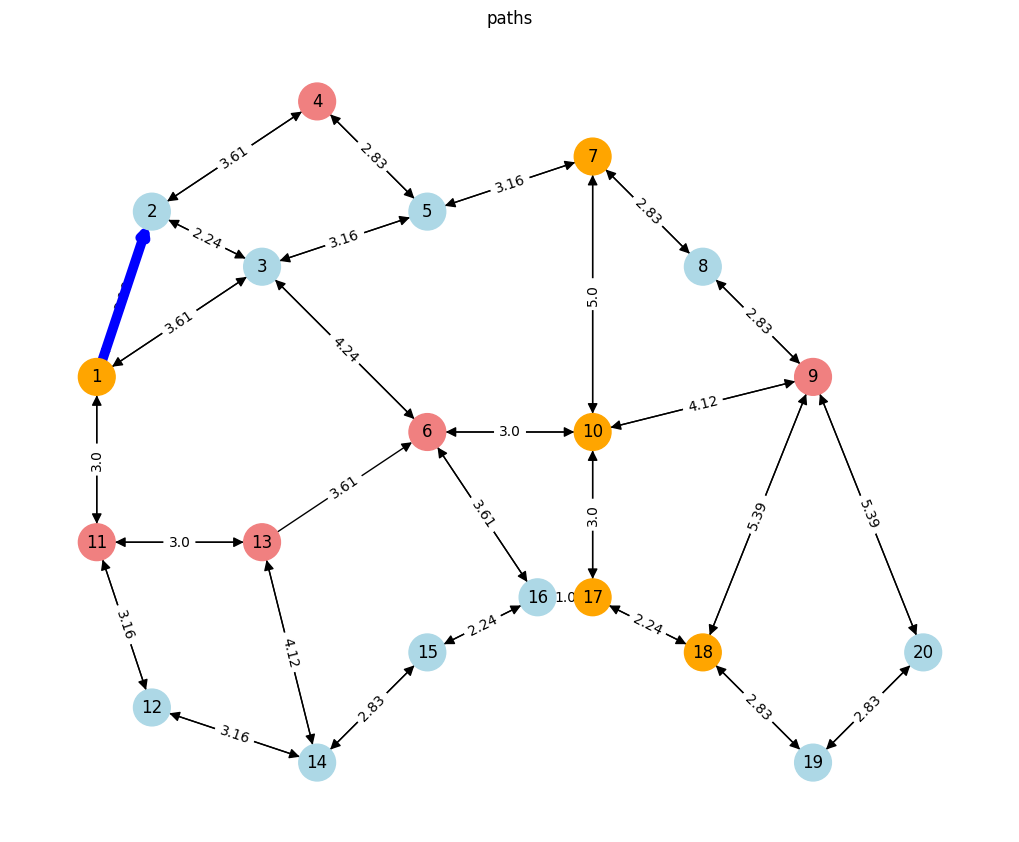

In [6]:

# Call function:
shortest_path_result = shortest_path(
    model = ConcreteModel(),
    source = 1,
    destination = 2,
    nodes= list(positions.keys()),
    arcs = connections,
    cost = edges,
    bool_print=True)


### TODO: Make animation

# Plot
G_closest = nx.DiGraph()
G_closest.add_edges_from(connections)

plt.figure(figsize=(10, 8))
nx.draw(G_closest, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
nx.draw_networkx_edge_labels(G_closest, pos=positions, edge_labels=edges, font_size=10)
nx.draw_networkx_edges(G_closest, pos=positions, edgelist=shortest_path_result, edge_color='blue', width=7)

plt.title("paths")
plt.show()




In [7]:
# Run shortest path problem for all combinations of nodes (all connections) and sum up the individual "sub-demands" of
# of each arc
import itertools
arc_demand = {key: 0 for key in connections_demand.keys() if key in connections}
for (source,destination) in connections_demand.keys():#dict(itertools.islice(connections_demand.items(), 3)).keys():
    shortest_path_result = shortest_path(
        model = ConcreteModel(),
        source = source,
        destination = destination,
        nodes= list(positions.keys()),
        arcs = connections,
        cost = edges)
    for (node_out,node_in) in shortest_path_result:
        arc_demand[(node_out,node_in)] = arc_demand[(node_out,node_in)] + connections_demand[(source,destination)]


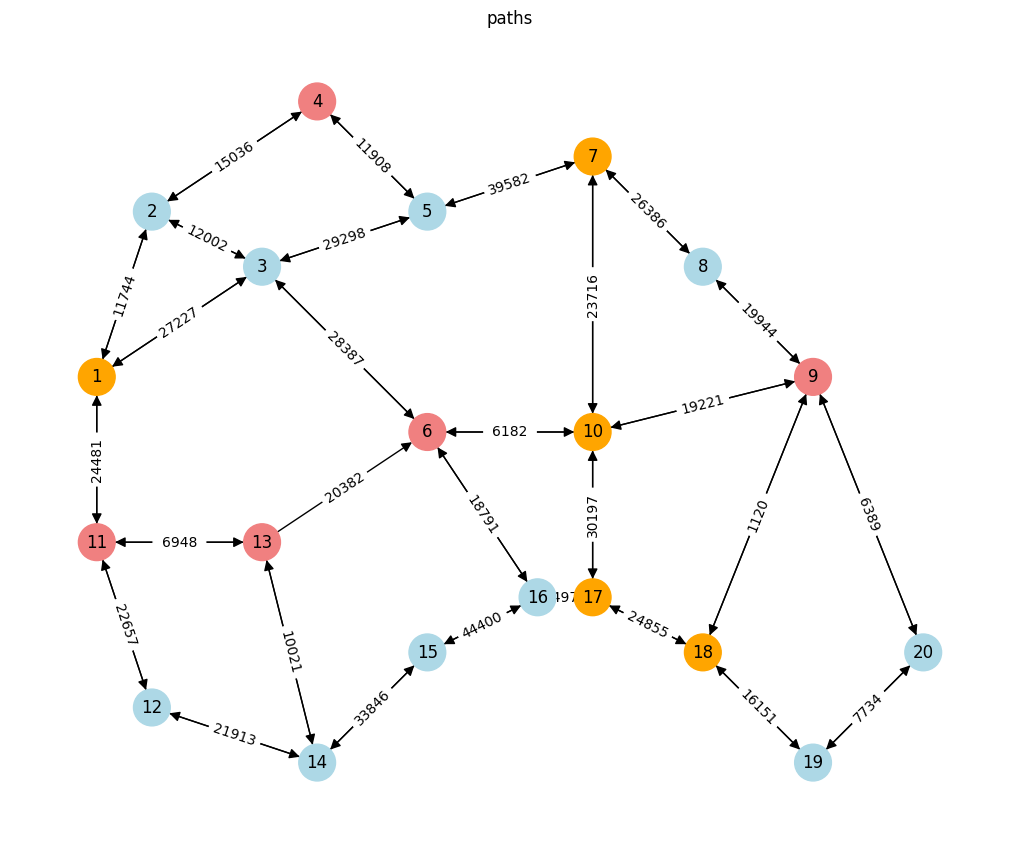

In [8]:

# TODO: Make heatmap for demand
# Plot
G_closest = nx.DiGraph()
G_closest.add_edges_from(connections)

plt.figure(figsize=(10, 8))
nx.draw(G_closest, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
nx.draw_networkx_edge_labels(G_closest, pos=positions, edge_labels=arc_demand, font_size=10)

plt.title("paths")
plt.show()


# Part 2 - Lines

In [9]:
# Optimization


# cost = fix_cost_per_line + number_of_trains*cost_per_train + cost_per_arc*arc_route for all lines

# constraints: 

# for each arc, demand_fullfilled >= demand <- demand 

# for each line, length <= max_length <- time 
    

Problem formulation: 

$min(\sum_{l=1}^{nlines} (fixcost+y_l\cdot costpertrain+\sum_{j=1}^{J}\sum_{i=1}^{I}x_{l;j,i}\cdot costperarc))$

s.t. 

*Demand Constraint:*

$demand_{i,j} \leq \sum_{l=1}^{nlines}y_l\cdot x_{l;j,i}$

*Flow Constraint:*

$\sum_{j:(i,j)}x_{l;i,j}+isstart_{l;i,j}=\sum_{j:(i,j)}x_{l;j,i}*+isend_{l;i,j}$

$\sum_{j:(i,j)}isstart_{l;i,j} = 1$

$\sum_{j:(i,j)}isend_{l;i,j} = 1$


*Max line length constraint*

$\sum_{j=1}^{J}\sum_{i=1}^{I}x_{l;j,i}=7$

In [46]:
from pyomo.environ import *

# Create model
model_trainlines = ConcreteModel()

# Sets
model_trainlines.nodes = Set(initialize=list(positions.keys()))  # Set of nodes
model_trainlines.arcs = Set(within=model_trainlines.nodes*model_trainlines.nodes, initialize=connections)  # Set of arcs

# Parameters
model_trainlines.demand = Param(model_trainlines.arcs, initialize=arc_demand)  # Demand on arcs

## lines
model_trainlines.cost_per_arc = Param(model_trainlines.arcs, initialize=edges)  # Cost of using an arc
model_trainlines.cost_per_train_line = Param(initialize=400)  # Fixed cost per train line
model_trainlines.max_lines = Param(initialize=20)  # Maximum possible train lines (upper bound)
model_trainlines.capacity_per_line = Param(initialize=5000)

## trains
model_trainlines.max_trains_per_line = Param(initialize=15)
model_trainlines.capacity_per_train = Param(initialize=800)
model_trainlines.cost_per_train = Param(initialize=100)

# Decision Variables
model_trainlines.lines = RangeSet(1, model_trainlines.max_lines)  # Maximum possible number of train lines (upper bound)
model_trainlines.active_lines = Var(within=NonNegativeIntegers, bounds=(0, model_trainlines.max_lines))  # Number of active train lines
model_trainlines.x = Var(model_trainlines.lines, model_trainlines.arcs, within=Binary)  # Binary: Train line t runs on arc (i,j)



model_trainlines.range_trains_per_line = RangeSet(1, model_trainlines.max_trains_per_line)
model_trainlines.active_trains_per_line = Var(model_trainlines.lines,within=NonNegativeIntegers, bounds=(0, model_trainlines.max_trains_per_line))  # Number of active train lines




In [41]:
# Objective Rule

def objective_rule_lines(model):
    cost = model.active_lines * model.cost_per_train_line \
            + sum(model.cost_per_train * model_trainlines.active_trains_per_line[l] for l in model.lines) \
           + sum(model.cost_per_arc[i, j] * model.x[l, i, j] for l in model.lines for (i, j) in model.arcs)

    return cost
model_trainlines.objective = Objective(rule=objective_rule_lines, sense=minimize)


In [48]:
# Define the demand constraint for each arc (i, j)
def demand_constr(model_trainlines, i, j):
    return model_trainlines.demand[i, j] <= sum(model_trainlines.x[l, i, j] * 
                                                model_trainlines.active_trains_per_line[l] * 
                                                model_trainlines.capacity_per_train 
                                                for l in model_trainlines.lines)

# Apply the constraint to all arcs
model_trainlines.demand_constraint = Constraint(model_trainlines.arcs, rule=demand_constr)


# Flow constraint

def flow_constr(model_trainlines,i,j):
    return ((sum(model_trainlines.x[l,i,j] for l in model_trainlines.lines for (i,j) in model_trainlines.arcs) 
             - sum(model_trainlines.x[l,j, i] for l in model_trainlines.lines for j in model_trainlines.nodes if (j,i) in model_trainlines.arcs)) == 0)




In [17]:
from pyomo.environ import *

# Create model
model = ConcreteModel()

# Sets
model.nodes = Set(initialize=list(positions.keys()))  # Set of nodes
model.arcs = Set(within=model.nodes*model.nodes, initialize=connections)  # Set of arcs
model.max_T = Param(initialize=10)  # Maximum possible train lines (upper bound)

# Parameters
model.d = Param(model.arcs, initialize=arc_demand)  # Demand on arcs
model.c = Param(model.arcs, initialize=edges)  # Cost of using an arc
model.capacity_per_arc = Param(model.arcs, initialize=arc_demand)  # Total capacity of an arc
model.cost_per_train_line = Param(initialize=400)  # Fixed cost per train line

# Decision Variables
model.T = RangeSet(1, model.max_T)  # Maximum possible number of train lines (upper bound)
model.x = Var(model.T, model.arcs, within=Binary)  # Binary: Train line t runs on arc (i,j)
model.f = Var(model.T, model.arcs, within=NonNegativeReals)  # Flow on arc (i,j) for train line t
model.num_lines = Var(within=NonNegativeIntegers, bounds=(0, model.max_T))  # Number of active train lines

# Objective: Minimize total cost, including the cost of train lines and the cost of arcs
def objective_rule(model):
    return model.num_lines * model.cost_per_train_line + \
           sum(model.c[i,j] * model.x[t,i,j] for t in model.T for (i,j) in model.arcs)
model.objective = Objective(rule=objective_rule, sense=minimize)

# Constraint: Ensure that the number of active train lines doesn't exceed the model.num_lines
def train_line_count_rule(model, t):
    return sum(model.x[t,i,j] for (i,j) in model.arcs) <= model.num_lines
model.train_line_count = Constraint(model.T, rule=train_line_count_rule)


# Flow conservation constraints for each train line at each node
def flow_conservation_rule(model, t, i):
    return sum(model.f[t,i,j] for j in model.nodes if (i,j) in model.arcs) - \
           sum(model.f[t,j,i] for j in model.nodes if (j,i) in model.arcs) == 0
model.flow_conservation = Constraint(model.T, model.nodes, rule=flow_conservation_rule)

# Demand satisfaction on each arc for each train line
def demand_satisfaction_rule(model, t, i, j):
    return model.f[t,i,j] <= model.d[i,j] * model.x[t,i,j]
model.demand_satisfaction = Constraint(model.T, model.arcs, rule=demand_satisfaction_rule)

# # Capacity constraint: Sum of flows across all train lines cannot exceed total arc capacity
# def capacity_constraint_rule(model, i, j):
#     return sum(model.f[t,i,j] for t in model.T) <= model.capacity_per_arc[i,j]
# model.capacity_constraint = Constraint(model.arcs, rule=capacity_constraint_rule)

  

# Solve the model
solver = SolverFactory('glpk')
solver.solve(model)

# Extract solution: number of train lines and their routes
train_routes = {}
for t in model.T:
    if t <= model.num_lines.value:
        train_routes[t] = [(i, j) for (i, j) in model.arcs if model.x[t, i, j].value == 1]

# Example usage: printing the optimized number of lines and routes
print(f"Optimized number of train lines: {model.num_lines.value}")
for t in train_routes:
    print(f"Train line {t} follows the route: {train_routes[t]}")


ERROR: Rule failed when generating expression for Constraint
active_train_lines with index 1: TypeError: unsupported operand type(s) for -:
'int' and 'InequalityExpression'
ERROR: Constructing component 'active_train_lines' from data=None failed:
        TypeError: unsupported operand type(s) for -: 'int' and
        'InequalityExpression'


TypeError: unsupported operand type(s) for -: 'int' and 'InequalityExpression'

In [ ]:
from pyomo.environ import *

# Create model
model = ConcreteModel()

# Sets
model.nodes = Set(initialize=nodes)  # Set of nodes
model.arcs = Set(within=model.nodes*model.nodes, initialize=arcs)  # Set of arcs
model.T = Set(initialize=train_lines)  # Set of train lines

# Parameters
model.d = Param(model.arcs, initialize=demand)  # Demand on arcs
model.c = Param(model.arcs, initialize=cost)  # Cost of using an arc for a train line
model.capacity_per_arc = Param(model.arcs, initialize=capacity_per_arc)  # Total capacity of an arc

# Decision Variables
model.x = Var(model.T, model.arcs, within=Binary)  # Binary: Train line t runs on arc (i,j)
model.f = Var(model.T, model.arcs, within=NonNegativeReals)  # Flow on arc (i,j) for train line t

# Objective: Minimize the total cost of running the train lines on the network
def objective_rule(model):
    return sum(model.c[i,j] * model.x[t,i,j] for t in model.T for (i,j) in model.arcs)
model.objective = Objective(rule=objective_rule, sense=minimize)

# Flow conservation constraints for each train line at each node
def flow_conservation_rule(model, t, i):
    return sum(model.f[t,i,j] for j in model.nodes if (i,j) in model.arcs) - \
           sum(model.f[t,j,i] for j in model.nodes if (j,i) in model.arcs) == 0
model.flow_conservation = Constraint(model.T, model.nodes, rule=flow_conservation_rule)

# Demand satisfaction on each arc for each train line
def demand_satisfaction_rule(model, t, i, j):
    return model.f[t,i,j] <= model.d[i,j] * model.x[t,i,j]
model.demand_satisfaction = Constraint(model.T, model.arcs, rule=demand_satisfaction_rule)

# Capacity constraint: Sum of flows across all train lines cannot exceed total arc capacity
def capacity_constraint_rule(model, i, j):
    return sum(model.f[t,i,j] for t in model.T) <= model.capacity_per_arc[i,j]
model.capacity_constraint = Constraint(model.arcs, rule=capacity_constraint_rule)

# Solve the model
solver = SolverFactory('glpk')
solver.solve(model)

# Extract solution: individual train lines and their routes
train_routes = {}
for t in model.T:
    train_routes[t] = [(i, j) for (i, j) in model.arcs if model.x[t, i, j].value == 1]

# Example usage: printing routes
for t in train_routes:
    print(f"Train line {t} follows the route: {train_routes[t]}")


# Spielwiese

In [12]:
from pyomo.environ import *

model_lines = ConcreteModel()

# Define sets
# model_lines.N = Set(initialize=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
# model_lines.A = Set(initialize=[(1, 2), (1, 3), ...])  # Add all arcs here

model_lines.nodes = Set(initialize=list(positions.keys())) 
model_lines.arcs = Set(within=model_lines.nodes*model_lines.nodes, initialize=connections)
model_lines.cost = Param(model_lines.arcs, initialize=edges)

# Define parameters
model_lines.demand = Param(model_lines.nodes, arc_demand)  # Demand for each arc
model_lines.fixed_cost = Param(model_lines.nodes, arc_demand)  # Fixed costs for each arc
model_lines.capacity = Param(initialize=1000)

# Decision variables
model_lines.x = Var(model_lines.nodes, within=Binary)  # Whether the line is established
model_lines.y = Var(model_lines.nodes, within=NonNegativeReals)  # Demand transported

# Objective function
model_lines.obj = Objective(expr=sum(model_lines.fixed_cost[i, j] * model_lines.x[i, j] for (i, j) in model_lines.nodes), sense=minimize)

# Constraints
model_lines.demand_constraint = ConstraintList()
for (i, j) in model_lines.nodes:
    model_lines.demand_constraint.add(model_lines.y[i, j] <= model_lines.demand[i, j] * model_lines.x[i, j])
    model_lines.demand_constraint.add(model_lines.y[i, j] <= model_lines.capacity * model_lines.x[i, j])

# Solve the model
solver = SolverFactory('glpk')  # or any other solver
solver.solve(model_lines)

# Display results
model_lines.display()


TypeError: cannot unpack non-iterable int object

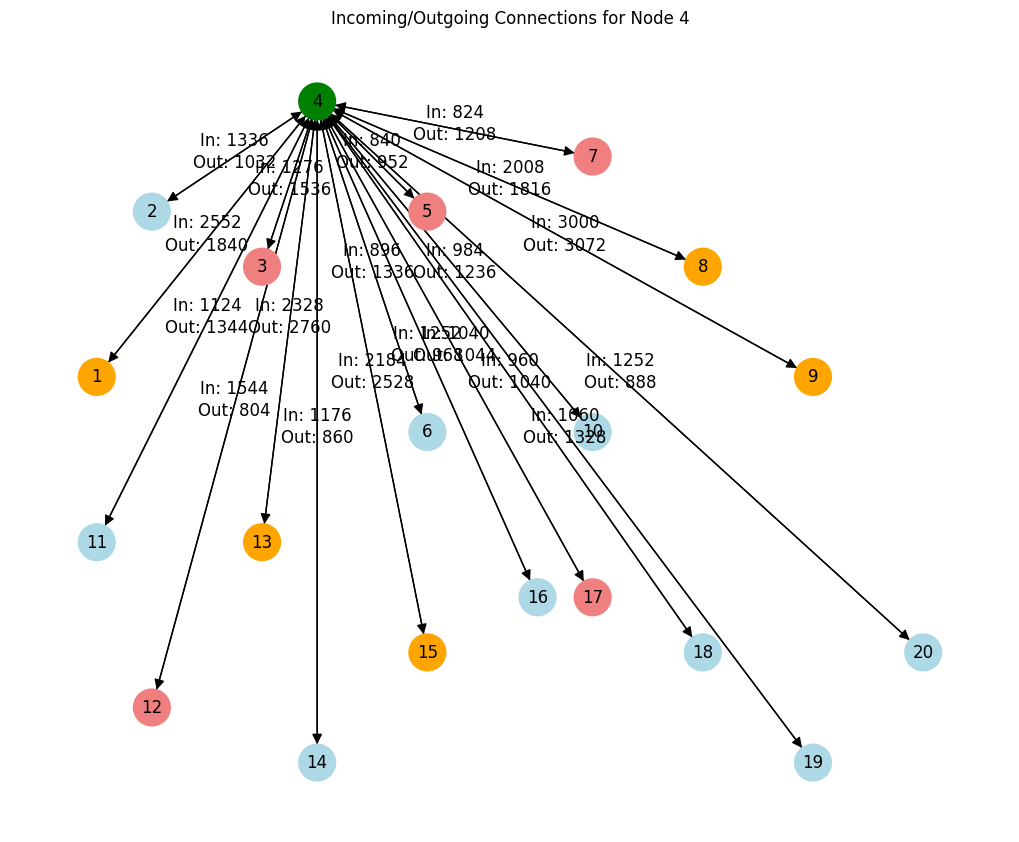

In [153]:

def plot_node_connections(node):
    """Plots incoming and outgoing connections for a specified node."""
    incoming_edges = G.in_edges(node)
    outgoing_edges = G.out_edges(node)
    
    # Filter connections and their demands for the specified node
    filtered_edges = list(incoming_edges) + list(outgoing_edges)
    filtered_demands = [demand_dict[edge] for edge in filtered_edges]

    # Create a new graph for the filtered edges
    H = nx.DiGraph()
    H.add_edges_from(filtered_edges)

    # Create a new positions dictionary
    filtered_positions = {node: positions[node]}  # Position of the specified node
    for edge in filtered_edges:
        filtered_positions[edge[0]] = positions[edge[0]]
        filtered_positions[edge[1]] = positions[edge[1]]

    # Plot the graph with the filtered connections
    plt.figure(figsize=(10, 8))

    # Highlight the central node
    central_node_color = 'green'  # Color for the central node
    node_colors[list(H.nodes()).index(node)] = central_node_color
    nx.draw(H, pos=filtered_positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
    plt.title(f"Incoming/Outgoing Connections for Node {node}")
    
   # Display demands on the plot
    for edge, demand in zip(incoming_edges, filtered_demands[:len(incoming_edges)]):
        x_start, y_start = filtered_positions[edge[0]]
        x_end, y_end = filtered_positions[edge[1]]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2 + 0.2, f"In: {demand}", fontsize=12, color='black', ha='center')
    
    for edge, demand in zip(outgoing_edges, filtered_demands[len(incoming_edges):]):
        x_start, y_start = filtered_positions[edge[0]]
        x_end, y_end = filtered_positions[edge[1]]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2 - 0.2, f"Out: {demand}", fontsize=12, color='black', ha='center')

    plt.show()

# Example: Plot connections for node 'n_4'
plot_node_connections(4)

# optimization

## Archive

In [ ]:
from pyomo.environ import *

# Define a model
model = ConcreteModel()

# Set of nodes and arcs (edges) with associated costs
nodes = [1, 2, 3, 4, 5,6,7,8]  # Example set of nodes
arcs = [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5),(5, 6),(6, 7),(7, 8)]  # Edges
costs = {(1, 2): 1, (1, 3): 2, (2, 4): 2, (3, 4): 1, (4, 5): 3,(5, 6):1,(6, 7):2,(7, 8):3}

node_start = 1
node_end = 7

# Parameters
model.nodes = Set(initialize=nodes)
model.arcsrcs = Set(within=model.nodes*model.nodes, initialize=arcs)
model.cost = Param(model.arcsrcs, initialize=costs)

# Decision variables: Flow along arcs (x_ij)
model.x = Var(model.arcsrcs, domain=NonNegativeReals)

# Objective: Minimize total cost along the path
def obj_rule(model):
    return sum(model.cost[i, j] * model.x[i, j] for (i, j) in model.arcsrcs)
model.obj = Objective(rule=obj_rule, sense=minimize)

# Constraints:
# 1. Flow conservation: Flow in = Flow out, except for source and destination
def flow_conservation_rule(model, node):
    if node == 1:  # Source node
        return sum(model.x[i, j] for (i, j) in model.arcsrcs if i == node) == 1
    elif node == 7:  # Destination node
        return sum(model.x[i, j] for (i, j) in model.arcsrcs if j == node) == 1
    else:  # Intermediate nodes
        return (sum(model.x[i, j] for (i, j) in model.arcsrcs if i == node) 
                == sum(model.x[i, j] for (i, j) in model.arcsrcs if j == node))
model.flow_conservation = Constraint(model.nodes, rule=flow_conservation_rule)

# Solve
SolverFactory('glpk').solve(model)

# Display the solution
model.x.display()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Number of nodes
n_nodes = 20

# Create a list for connections
nodes = range(n_nodes)
connections = [(m,n) for m in range(n_nodes) for n in range(n_nodes) if m != n]

# Create a directed graph
G = nx.DiGraph()

# Add edges from the connections list
G.add_edges_from(connections)

# Manually specify positions of nodes (coordinates reflect their distance)
positions = {
    'n_0': (2, 10),
    'n_1': (3, 13),
    'n_2': (5, 12),
    'n_3': (6, 15),
    'n_4': (8, 13),  # Main node
    'n_5': (8, 9),   # Main node
    'n_6': (11, 14),
    'n_7': (13, 12), # Main node
    'n_8': (15, 10),
    'n_9': (11, 9),
    'n_10': (2, 7),
    'n_11': (3, 4),
    'n_12': (5, 7),  # Main node
    'n_13': (6, 3),
    'n_14': (8, 5),
    'n_15': (10, 6),
    'n_16': (11, 6),
    'n_17': (13, 5), # Main node
    'n_18': (15, 3),
    'n_19': (17, 5)
}

# Create a list of demands (randomly generated for illustration)
demands = [random.randint(200, 400) for _ in range(len(connections))]

# Define main nodes that have 4 times demand
main_nodes = {'n_4', 'n_5', 'n_7', 'n_12', 'n_17'}
medium_nodes = {'n_9','n_15','n_13','n_0','n_8'}


# Pair each connection with a demand, adjusting for main and medium nodes
connection_demands = []
for connection, demand in zip(connections, demands):
    if connection[0] in main_nodes or connection[1] in main_nodes:
        demand *= 4  # Double the demand for connections involving main nodes
    if connection[0] in medium_nodes or connection[1] in medium_nodes:
        demand *= 2  # Double the demand for connections involving medium nodes
    connection_demands.append((connection, demand))

# Create a dictionary for easy access to demands
demand_dict = {conn: demand for conn, demand in connection_demands}

# Plot the graph with specified distances between nodes
plt.figure(figsize=(10, 8))

# Determine colors for nodes based on whether they are main nodes or not
node_colors = ['lightcoral' if node in main_nodes else 'orange' if node in medium_nodes else 'lightblue' for node in G.nodes()]
node_color_dict = {node: color for node, color in zip(G.nodes(), node_colors)}

nx.draw(G, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
plt.title("Node Connections with Specified Distances")
plt.show()


In [ ]:
# Function to calculate Euclidean distance between two nodes
# paths = [
#     (0, 10), 
#      (10, 0), (0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (3, 1),
#     (2, 4),
#     (4, 2),
#     (3, 4),
#     (4, 3),
#     (4, 6),
#     (6, 4),
#     (5, 9),
#     (9, 5),
#     (5, 1),
#     (12,5),
#     (5, 15),
#     (15, 5),
#     (6, 7),
#     (7, 6),
#     (9, 7),
#     (7, 9),
#     (4, 5),
#     (5, 4),
#     (7, 8),
#     (8, 7),
#     (8, 9),
#     (9, 8),
#     (8, 17),
#     (17, 8),
#     (9, 16),
#     (16,9),
#     (10,12),
#     (12,10),
#     (10,11),
#     (11,10),
#     (11,13),
#     (13,11),
#     (13,14),
#     (14,13),
#     (13,12),
#     (12,13),
#     (14,15),
#     (15,14),
#     (15,16),
#     (16,15),
#     (16,17),
#     (17,16),
#     (17,18),
#     (18,17),
#     (18,19),
#     (19,18),
#     (19,17),
#     (17,19),
#     (19,8),
#     (8, 19)]


# paths = [
#     (1, 11), (11, 1), (1, 2), (2, 1), (1, 3), (3, 1), 
#     (2, 3), (3, 2), (2, 4), (4, 2), (3, 5), (5, 3), 
#     (4, 5), (5, 4), (5, 7), (7, 5), (6, 10), (10, 6), 
#     (6, 2), (13, 6), (6, 16), (16, 6), (7, 8), (8, 7), 
#     (10, 8), (8, 10), (5, 6), (6, 5), (8, 9), (9, 8), 
#     (9, 10), (10, 9), (9, 18), (18, 9), (10, 17), (17, 10), 
#     (11, 13), (13, 11), (11, 12), (12, 11), (12, 14), (14, 12), 
#     (14, 15), (15, 14), (14, 13), (13, 14), (15, 16), (16, 15), (16, 17), (17, 16), 
#     (17, 18), (18, 17), (18, 19), (19, 18), (19, 17), (17, 19), (19, 9), (9, 19)
# ]